In [1]:
import pandas as pd
import numpy as np 
df = pd.read_csv('rentprediction_dataset_v5.csv')
print(df.columns.to_list())

['rent', 'age', 'sqmtr', 'newbuild', 'rooms', 'elabel', 'parking', 'bedrooms', 'bathrooms', 'floor', 'garden', 'balcony', 'rooftop', 'apartment', 'duplexmulti', 'luxury', 'singlefam', 'houseboat', 'pc4', 'percnative_pc4', 'sizehoudehold_pc4', 'percpropertyown_pc4', 'taxablepropertyvaluation', 'populationdensity_pc4', 'latitude', 'longitude', 'eucl_dist_to_Amstelland', 'eucl_dist_to_Amstelpark', 'eucl_dist_to_Amsterdamse Bos', 'eucl_dist_to_Beatrixpark', 'eucl_dist_to_Brasapark', 'eucl_dist_to_De Bretten', 'eucl_dist_to_Diemerpark', 'eucl_dist_to_Erasmuspark', 'eucl_dist_to_Flevopark', 'eucl_dist_to_Gaasperplas', 'eucl_dist_to_Gijsbrecht van Aemstelpark', 'eucl_dist_to_Houthavenpark', 'eucl_dist_to_Martin Luther Kingpark', 'eucl_dist_to_Nelson Mandelapark', 'eucl_dist_to_Noorder IJplas', 'eucl_dist_to_Noorderpark', 'eucl_dist_to_Oeverlanden', 'eucl_dist_to_Oosterpark', 'eucl_dist_to_Park Frankendael', 'eucl_dist_to_Park Schinkeleilanden', 'eucl_dist_to_Park Somerlust', 'eucl_dist_to_Rem

Data Transformation Based on previous test where Pearson Correlation Coefficient if maximized for each variable to y_train (aka rent)

In [2]:
#apply best transformation based on training set to the whole dataset and then split the daaset.
best_transformation = {'rent': 'log', 'age': 'log', 'sqmtr': 'sqrt', 'newbuild': 'none', 'rooms': 'none', 'elabel': 'log', 'parking': 'none', 'bedrooms': 'none', 'bathrooms': 'square', 'floor': 'log', 'garden': 'none', 'balcony': 'none', 'rooftop': 'none', 'apartment': 'none', 'duplexmulti': 'none', 'luxury': 'none', 'singlefam': 'none', 'houseboat': 'none', 'pc4': 'square', 'percnative_pc4': 'inverse', 'sizehoudehold_pc4': 'inverse', 'percpropertyown_pc4': 'sqrt', 'taxablepropertyvaluation': 'log', 'populationdensity_pc4': 'sqrt', 'latitude': 'square', 'longitude': 'inverse', 'eucl_dist_to_Amstelland': 'inverse', 'eucl_dist_to_Amstelpark': 'inverse', 'eucl_dist_to_Amsterdamse Bos': 'sqrt', 'eucl_dist_to_Beatrixpark': 'sqrt', 'eucl_dist_to_Brasapark': 'square', 'eucl_dist_to_De Bretten': 'sqrt', 'eucl_dist_to_Diemerpark': 'square', 'eucl_dist_to_Erasmuspark': 'square', 'eucl_dist_to_Flevopark': 'square', 'eucl_dist_to_Gaasperplas': 'square', 'eucl_dist_to_Gijsbrecht van Aemstelpark': 'sqrt', 'eucl_dist_to_Houthavenpark': 'inverse', 'eucl_dist_to_Martin Luther Kingpark': 'exp', 'eucl_dist_to_Nelson Mandelapark': 'square', 'eucl_dist_to_Noorder IJplas': 'sqrt', 'eucl_dist_to_Noorderpark': 'square', 'eucl_dist_to_Oeverlanden': 'square', 'eucl_dist_to_Oosterpark': 'square', 'eucl_dist_to_Park Frankendael': 'square', 'eucl_dist_to_Park Schinkeleilanden': 'sqrt', 'eucl_dist_to_Park Somerlust': 'exp', 'eucl_dist_to_Rembrandtpark': 'square', 'eucl_dist_to_Sarphatipark': 'inverse', 'eucl_dist_to_Schellingwouderbreek': 'square', 'eucl_dist_to_Sloterpark': 'sqrt', 'eucl_dist_to_Strand IJburg': 'square', 'eucl_dist_to_Tuinen van West': 'sqrt', 'eucl_dist_to_Vliegenbos': 'square', 'eucl_dist_to_Volgermeer': 'square', 'eucl_dist_to_Vondelpark': 'sqrt', 'eucl_dist_to_Wertheimpark': 'inverse', 'eucl_dist_to_Westerpark': 'inverse', 'eucl_dist_to_Nieuwezijds Kolk': 'sqrt', 'eucl_dist_to_Surinameplein / Curaçaostraat': 'sqrt', 'eucl_dist_to_Johan Huizingalaan': 'square', 'eucl_dist_to_Prinsengracht': 'inverse', 'eucl_dist_to_Keizergracht': 'sqrt', 'eucl_dist_to_Koningsplein': 'sqrt', 'eucl_dist_to_Matterhorn': 'sqrt', 'eucl_dist_to_Pilatus': 'sqrt', 'eucl_dist_to_Inarisstraat': 'sqrt', 'eucl_dist_to_Baden Powellweg': 'sqrt', 'eucl_dist_to_Hoekenes': 'sqrt', 'eucl_dist_to_Louis Davidsstraat': 'square', 'eucl_dist_to_Eerste Constantijn Huygensstraat / Overtoom': 'sqrt', 'eucl_dist_to_Rhijnvis Feithstraat': 'sqrt', 'eucl_dist_to_Kruislaan': 'square', 'eucl_dist_to_Brinkstraat': 'square', 'eucl_dist_to_Arent Krijtstraat': 'square', 'eucl_dist_to_Diemerbrug': 'square', 'eucl_dist_to_Diemen Sniep': 'square', 'eucl_dist_to_Dapperstraat': 'square', 'eucl_dist_to_Meer en Vaart': 'square', 'eucl_dist_to_Derkinderenstraat': 'square', 'eucl_dist_to_Corantijnstraat': 'sqrt', 'eucl_dist_to_Postjesweg / Hoofdweg': 'exp', 'eucl_dist_to_Ten Katestraat': 'sqrt', 'eucl_dist_to_Kinkerstraat / Bilderdijkstraat': 'sqrt', 'eucl_dist_to_Leidseplein': 'sqrt', 'eucl_dist_to_Ecuplein': 'sqrt', 'eucl_dist_to_J.P. Heijestraat': 'sqrt', 'eucl_dist_to_Van Hallstraat': 'sqrt', 'eucl_dist_to_Nieuwe Willemsstraat': 'sqrt', 'eucl_dist_to_Azartplein': 'square', 'eucl_dist_to_Plein `40-`45': 'sqrt', 'eucl_dist_to_Van Limburg Stirumstraat': 'sqrt', 'eucl_dist_to_Eerste Coehoornstraat': 'square', 'eucl_dist_to_C. van Eesterenlaan': 'square', 'eucl_dist_to_K. `s-Gravesandestraat': 'exp', 'eucl_dist_to_Vijzelgracht /Weteringcircuit': 'sqrt', 'eucl_dist_to_Rijksmuseum': 'sqrt', 'eucl_dist_to_Haarlemmerplein': 'sqrt', 'eucl_dist_to_De Wittenkade': 'sqrt', 'eucl_dist_to_Nassaukade': 'sqrt', 'eucl_dist_to_Alexanderplein': 'square', 'eucl_dist_to_Hoogte Kadijk': 'square', 'eucl_dist_to_Eerste Leeghwaterstraat': 'square', 'eucl_dist_to_Rietlandpark': 'square', 'eucl_dist_to_Willem de Zwijerlaan': 'sqrt', 'eucl_dist_to_De Pijp': 'sqrt', 'eucl_dist_to_Wiltzanghlaan': 'square', 'eucl_dist_to_Molenwerf': 'sqrt', 'eucl_dist_to_Europaplein': 'inverse', 'eucl_dist_to_Waalstraat': 'inverse', 'eucl_dist_to_Maasstraat': 'inverse', 'eucl_dist_to_Dintelstraat': 'inverse', 'eucl_dist_to_Amstelveen Stadshart': 'sqrt', 'eucl_dist_to_Marco Polostraat': 'square', 'eucl_dist_to_Jan van Galenstraat': 'square', 'eucl_dist_to_Rozengracht / Marnixstraat': 'sqrt', 'eucl_dist_to_Roelof Hartplein': 'sqrt', 'eucl_dist_to_Bos en Lommerweg': 'square', 'eucl_dist_to_Cornelis Troostplein / Van Hillegaertstraat': 'sqrt', 'eucl_dist_to_Dam / Paleisstraat': 'sqrt', 'eucl_dist_to_Burg. Van Leeuwenlaan': 'sqrt', 'eucl_dist_to_Burg. Fockstraat': 'sqrt', 'eucl_dist_to_Burg.Eliasstraat': 'sqrt', 'eucl_dist_to_Burg. Rendorpstraat': 'sqrt', 'eucl_dist_to_Admiraal Helfrichstraat': 'square', 'eucl_dist_to_Dr. H. Colijnstraat': 'sqrt', 'eucl_dist_to_Lambertus Zijlplein': 'sqrt', 'eucl_dist_to_Mercatorplein': 'square', 'eucl_dist_to_Jan Voermanstraat': 'square', 'eucl_dist_to_Rembrandtplein': 'inverse', 'eucl_dist_to_Artis': 'log', 'eucl_dist_to_Burg. Röellstraat / Slotermerlaan': 'sqrt', 'eucl_dist_to_Mr. Visserplein': 'inverse', 'eucl_dist_to_Eerste Van Swindenstraat': 'square', 'eucl_dist_to_Linnaeusstraat / Wijttenbachstraat': 'square', 'eucl_dist_to_Insulindeweg': 'square', 'eucl_dist_to_Jan Tooropstraat': 'square', 'eucl_dist_to_Bos en Lommerplein': 'square', 'eucl_dist_to_Soembawastraat': 'square', 'eucl_dist_to_Molukkenstraat': 'square', 'eucl_dist_to_Hogeweg': 'square', 'eucl_dist_to_Hugo de Vrieslaan': 'square', 'eucl_dist_to_Pontanusstraat': 'square', 'eucl_dist_to_Zeeburgerdijk': 'square', 'eucl_dist_to_Javaplein': 'square', 'eucl_dist_to_Dam': 'sqrt', 'eucl_dist_to_Rokin': 'sqrt', 'eucl_dist_to_Marie Heinekenplein': 'sqrt', 'eucl_dist_to_IJsbaanpad': 'sqrt', 'eucl_dist_to_Concertgebouw': 'sqrt', 'eucl_dist_to_Dijkgraafplein': 'sqrt', 'eucl_dist_to_Osdorpplein West': 'sqrt', 'eucl_dist_to_Osdorpplein Oost': 'sqrt', 'eucl_dist_to_Elandsgracht': 'sqrt', 'eucl_dist_to_De Clercqstraat / Bilderdijkstraat': 'sqrt', 'eucl_dist_to_Amstelveenseweg': 'sqrt', 'eucl_dist_to_Westlandgracht': 'square', 'eucl_dist_to_Laan van Vlaanderen': 'square', 'eucl_dist_to_Centrum Nieuw Sloten': 'square', 'eucl_dist_to_Oudenaardeplantsoen': 'square', 'eucl_dist_to_Cornelis Schuytstraat': 'sqrt', 'eucl_dist_to_Valeriusplein': 'sqrt', 'eucl_dist_to_Delflandlaan': 'square', 'eucl_dist_to_Louwesweg': 'square', 'eucl_dist_to_Hoofddorpplein': 'sqrt', 'eucl_dist_to_Van Baerlestraat': 'sqrt', 'eucl_dist_to_Prinses Irenestraat': 'sqrt', 'eucl_dist_to_Stadionweg / Beethovenstraat': 'sqrt', 'eucl_dist_to_Minervaplein': 'sqrt', 'eucl_dist_to_IJburg': 'square', 'eucl_dist_to_Oostpoort': 'square', 'eucl_dist_to_Muziekgebouw Bimhuis': 'exp', 'eucl_dist_to_Kattenburgerstraat': 'square', 'eucl_dist_to_Zuiderzeeweg': 'square', 'eucl_dist_to_Steigereiland': 'square', 'eucl_dist_to_Vennepluimstraat': 'square', 'eucl_dist_to_Diemerparklaan': 'square', 'eucl_dist_to_Lumièrestraat': 'square', 'eucl_dist_to_Zoutkeetsgracht': 'sqrt', 'eucl_dist_to_Beukenweg': 'exp', 'eucl_dist_to_Marnixplein': 'sqrt', 'eucl_dist_to_Victorieplein': 'inverse', 'eucl_dist_to_Wibautstraat': 'none', 'eucl_dist_to_Lutmastraat': 'inverse', 'eucl_dist_to_Amsteldijk': 'none', 'eucl_dist_to_Muiderpoortstation': 'square', 'eucl_dist_to_Fredrik Hendrikplantsoen': 'sqrt', 'eucl_dist_to_Amstelkade': 'inverse', 'eucl_dist_to_Camperstraat': 'exp', 'eucl_dist_to_Van Woustraat / Ceintuurbaan': 'inverse', 'eucl_dist_to_Tweede Van der Helststraat': 'inverse', 'eucl_dist_to_Keizersgracht': 'inverse', 'eucl_dist_to_Frederiksplein / Stadhouderskade': 'inverse', 'eucl_dist_to_Station Zuid': 'sqrt', 'eucl_dist_to_A.J. Ernststraat': 'sqrt', 'eucl_dist_to_Parnassusweg': 'sqrt', 'eucl_dist_to_Uilenstede': 'inverse', 'eucl_dist_to_Olympisch Stadion': 'sqrt', 'eucl_dist_to_Zonnestein': 'inverse', 'eucl_dist_to_Onderuit': 'inverse', 'eucl_dist_to_Station Lelylaan': 'square', 'eucl_dist_to_Isolatorweg': 'sqrt', 'eucl_dist_to_Gein': 'square', 'eucl_dist_to_Overamstel': 'exp', 'eucl_dist_to_Reigersbos': 'square', 'eucl_dist_to_Station Sloterdijk': 'sqrt', 'eucl_dist_to_Burg. De Vlugtlaan': 'sqrt', 'eucl_dist_to_Henk Sneevlietweg': 'square', 'eucl_dist_to_Heemstedestraat': 'square', 'eucl_dist_to_Postjesweg': 'square', 'eucl_dist_to_Station RAI': 'inverse', 'eucl_dist_to_Strandvliet': 'square', 'eucl_dist_to_Station Bijlmer ArenA': 'square', 'eucl_dist_to_Bullewijk': 'square', 'eucl_dist_to_Station Holendrecht': 'square', 'eucl_dist_to_Station Duivendrecht': 'square', 'eucl_dist_to_De Boelelaan/VU': 'sqrt', 'eucl_dist_to_Van Boshuizenstraat': 'sqrt', 'eucl_dist_to_Spaklerweg': 'square', 'eucl_dist_to_Centraal Station': 'inverse', 'eucl_dist_to_Waterlooplein': 'inverse', 'eucl_dist_to_Weesperplein': 'inverse', 'eucl_dist_to_Olympiaweg': 'sqrt', 'eucl_dist_to_Olympiaplein': 'sqrt', 'eucl_dist_to_Gerrit van der Veenstraat': 'sqrt', 'eucl_dist_to_Nieuwmarkt': 'inverse', 'eucl_dist_to_Amstelstation': 'exp', 'eucl_dist_to_Van der Madeweg': 'square', 'eucl_dist_to_Verrijn Stuartweg': 'square', 'eucl_dist_to_Station Ganzenhoef': 'square', 'eucl_dist_to_Kraaiennest station': 'square', 'eucl_dist_to_Venserpolder': 'square', 'eucl_dist_to_Witte de Withstraat': 'sqrt', 'eucl_dist_to_Willem Schoutenstraat': 'square', 'eucl_dist_to_Admiraal De Ruijterweg': 'sqrt', 'eucl_dist_to_Station Sloterdijjk': 'sqrt', 'eucl_dist_to_Station Diemen-Zuid': 'square', 'eucl_dist_to_Bob Haarmslaan': 'square', 'eucl_dist_to_Westermarkt': 'sqrt', 'eucl_dist_to_Noord': 'square', 'eucl_dist_to_Vijzelgracht': 'sqrt', 'eucl_dist_to_Museumplein': 'sqrt', 'eucl_dist_to_Hugo de Grootplein': 'sqrt', 'eucl_dist_to_Drenthepark': 'inverse', 'eucl_dist_to_Bloemgracht': 'sqrt', 'eucl_dist_to_De Rijpstraat': 'square', 'eucl_dist_to_VUmc': 'sqrt', 'eucl_dist_to_Kronenburg': 'inverse', 'eucl_dist_to_Oranjebaan': 'inverse', 'eucl_dist_to_Eerste Marnixdwarsstraat': 'sqrt', 'eucl_dist_to_Plantage Lepellaan': 'exp', 'eucl_dist_to_Ouderkerkslaan': 'inverse', 'eucl_dist_to_Sportlaan': 'sqrt', 'eucl_dist_to_Meent': 'sqrt', 'eucl_dist_to_Brink': 'sqrt', 'eucl_dist_to_Poortwachter': 'sqrt', 'eucl_dist_to_Sacharovlaan': 'sqrt', 'eucl_dist_to_Westwijk': 'sqrt', 'eucl_dist_to_Station Amsterdam Muiderpoort': 'square', 'eucl_dist_to_Station Amsterdam Amstel': 'exp', 'eucl_dist_to_Station Amsterdam Science Park': 'square', 'eucl_dist_to_Station Amsterdam Sloterdijk': 'sqrt', 'eucl_dist_to_Station Amsterdam Lelylaan': 'square', 'eucl_dist_to_Station RAI Amsterdam': 'sqrt', 'eucl_dist_to_Station Amsterdam Zuid/WTC': 'sqrt', 'eucl_dist_to_Station Amsterdam Bijlmer': 'square', 'eucl_dist_to_Station Amsterdam Holendrecht': 'square', 'eucl_dist_to_Station Weesp': 'square', 'eucl_dist_to_Station Amsterdam Centraal': 'inverse', 'eucl_dist_to_nearest_park': 'inverse', 'eucl_dist_to_nearest_train_station': 'sqrt', 'eucl_dist_to_nearest_tramsubway': 'sqrt'}

def log_transform(x):
    return np.log(x + 1)  # Add 1 to avoid log(0)

def sqrt_transform(x):
    return np.sqrt(x)

def inverse_transform(x):
    return 1 / (x + 1)  # Avoid division by zero

def square_transform(x):
    return np.square(x)

def exp_transform(x):
    return np.exp(np.clip(x, None, 20))  # Clip to avoid very large values

# List of transformations
transformations = {
    'none': lambda x: x,
    'log': log_transform,
    'sqrt': sqrt_transform,
    'inverse': inverse_transform,
    'square': square_transform,
    'exp': exp_transform
}

def transform_dataframe(df, best_transformations):
    transformed_df = pd.DataFrame()
    for column in df.columns:
        best_transformation = best_transformations[column]
        if best_transformation == 'none':
            transformed_df[column] = df[column]
        else:
            transformed_df[f'{column}_{best_transformation}'] = transformations[best_transformation](df[column])
    
    transformed_columns = [f'{column}_{best_transformations[column]}' if best_transformations[column] != 'none' else column for column in df.columns]
    return transformed_df[transformed_columns]

df_transformed = transform_dataframe(df, best_transformation)

df_transformed.head()

/tmp/ipykernel_1293/426146930.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df[f'{column}_{best_transformation}'] = transformations[best_transformation](df[column])
/tmp/ipykernel_1293/426146930.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df[f'{column}_{best_transformation}'] = transformations[best_transformation](df[column])
/tmp/ipykernel_1293/426146930.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

,rent_log,age_log,sqmtr_sqrt,newbuild,rooms,elabel_log,parking,bedrooms,bathrooms_square,floor_log,...,eucl_dist_to_Station Amsterdam Lelylaan_square,eucl_dist_to_Station RAI Amsterdam_sqrt,eucl_dist_to_Station Amsterdam Zuid/WTC_sqrt,eucl_dist_to_Station Amsterdam Bijlmer_square,eucl_dist_to_Station Amsterdam Holendrecht_square,eucl_dist_to_Station Weesp_square,eucl_dist_to_Station Amsterdam Centraal_inverse,eucl_dist_to_nearest_park_inverse,eucl_dist_to_nearest_train_station_sqrt,eucl_dist_to_nearest_tramsubway_sqrt
0,6.952729,0.000000,6.633250,1.0,2.0,1.620430,0.0,1.0,2.097516,0.693147,...,0.000013,0.235172,0.200337,0.014010,0.018520,0.044701,0.937122,0.987651,0.059524,0.055331
1,6.974479,1.098612,6.633250,1.0,1.0,1.945910,0.0,1.0,2.180321,1.386294,...,0.029053,0.340968,0.363124,0.005035,0.005100,0.003319,0.903515,0.989395,0.236917,0.055557
2,7.003065,0.000000,7.071068,1.0,2.0,1.594071,0.0,1.0,1.339776,1.280500,...,0.001130,0.241667,0.222111,0.013813,0.018673,0.041188,0.955572,0.988753,0.130116,0.060760
3,7.006695,1.098612,6.633250,1.0,1.0,1.945910,0.0,1.0,2.179334,1.791759,...,0.029045,0.340937,0.363095,0.005033,0.005100,0.003322,0.903535,0.989378,0.236870,0.055656
4,7.008505,0.000000,7.483315,1.0,2.0,1.618338,0.0,1.0,2.104449,0.693147,...,0.000007,0.236969,0.202431,0.014212,0.018750,0.045058,0.936541,0.987163,0.051916,0.049026


In [3]:
#split the transformed dataframe
from sklearn.model_selection import train_test_split

y = df_transformed['rent_log']
X = df_transformed.drop(columns={'rent_log'})

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.177, random_state=10)

In [9]:
#split the transformed dataframe
from sklearn.model_selection import train_test_split

y = df['rent']
X = df.drop(columns={'rent'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
plt.figure(figsize=(15, 4))
plt.boxplot(y_train, vert=False)
plt.title('Boxplot of rent_log')
plt.xlabel('rent_log')
plt.show()

NameError: name 'plt' is not defined

In [6]:
from scipy.stats.mstats import winsorize

y_train = pd.Series(winsorize(y_train, limits=[0, 0.02270147559]))  # 5% limits on both sides

Principal Component Analysis on the spatial data

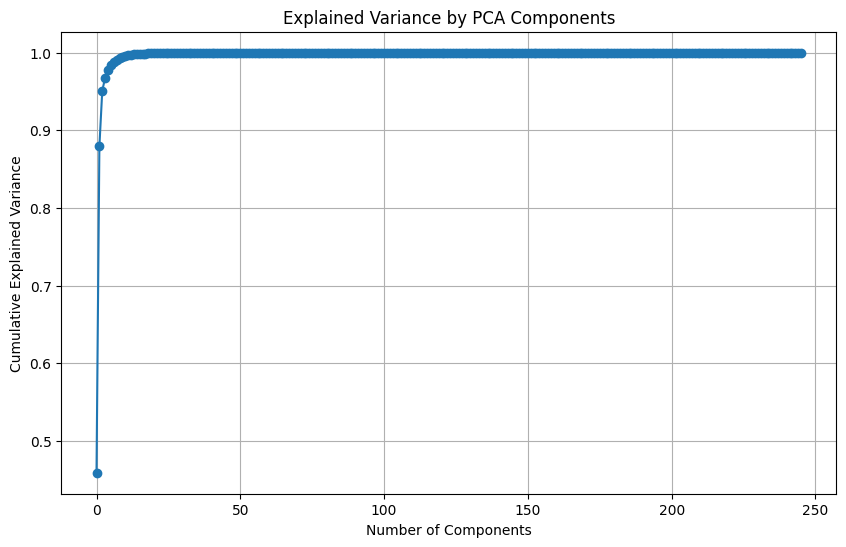

Number of components explaining 95.0% of variance: 3


In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Standardize the location variables
location_columns = [col for col in X_train.columns if col.startswith('eucl_dist_to_')]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[location_columns])
X_val_scaled = scaler.transform(X_val[location_columns])
X_test_scaled = scaler.transform(X_test[location_columns])

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Determine the number of components to keep
variance_threshold = 0.95  # for example, 95% variance
n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
print(f"Number of components explaining {variance_threshold * 100}% of variance: {n_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Combine PCA components with the original non-location features
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'pc_{i+1}' for i in range(n_components)])
X_val_pca_df = pd.DataFrame(X_val_pca, columns=[f'pc_{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'pc_{i+1}' for i in range(n_components)])

# If you have other features, concatenate them with the PCA components
non_location_columns = [col for col in X_train.columns if not col.startswith('eucl_dist_to_')]
X_train_final = pd.concat([X_train[non_location_columns].reset_index(drop=True), X_train_pca_df], axis=1)
X_val_final = pd.concat([X_val[non_location_columns].reset_index(drop=True), X_val_pca_df], axis=1)
X_test_final = pd.concat([X_test[non_location_columns].reset_index(drop=True), X_test_pca_df], axis=1)

In [8]:
X_train_final.columns

Index(['age_log', 'sqmtr_sqrt', 'newbuild', 'rooms', 'elabel_log', 'parking',
       'bedrooms', 'bathrooms_square', 'floor_log', 'garden', 'balcony',
       'rooftop', 'apartment', 'duplexmulti', 'luxury', 'singlefam',
       'houseboat', 'pc4_square', 'percnative_pc4_inverse',
       'sizehoudehold_pc4_inverse', 'percpropertyown_pc4_sqrt',
       'taxablepropertyvaluation_log', 'populationdensity_pc4_sqrt',
       'latitude_square', 'longitude_inverse', 'pc_1', 'pc_2', 'pc_3'],
      dtype='object')

                         Feature  Importance
13                   duplexmulti    0.000000
25                          pc_1    0.000000
23               latitude_square    0.000000
19     sizehoudehold_pc4_inverse    0.000000
17                    pc4_square    0.000000
16                     houseboat    0.000000
15                     singlefam    0.000000
14                        luxury    0.000000
12                     apartment    0.000000
11                       rooftop    0.000000
27                          pc_3    0.000000
9                         garden    0.000000
10                       balcony    0.000000
4                     elabel_log    0.000000
5                        parking    0.000000
3                          rooms    0.000000
8                      floor_log    0.000000
6                       bedrooms    0.000469
24             longitude_inverse    0.000489
20      percpropertyown_pc4_sqrt    0.002668
22    populationdensity_pc4_sqrt    0.011904
18        

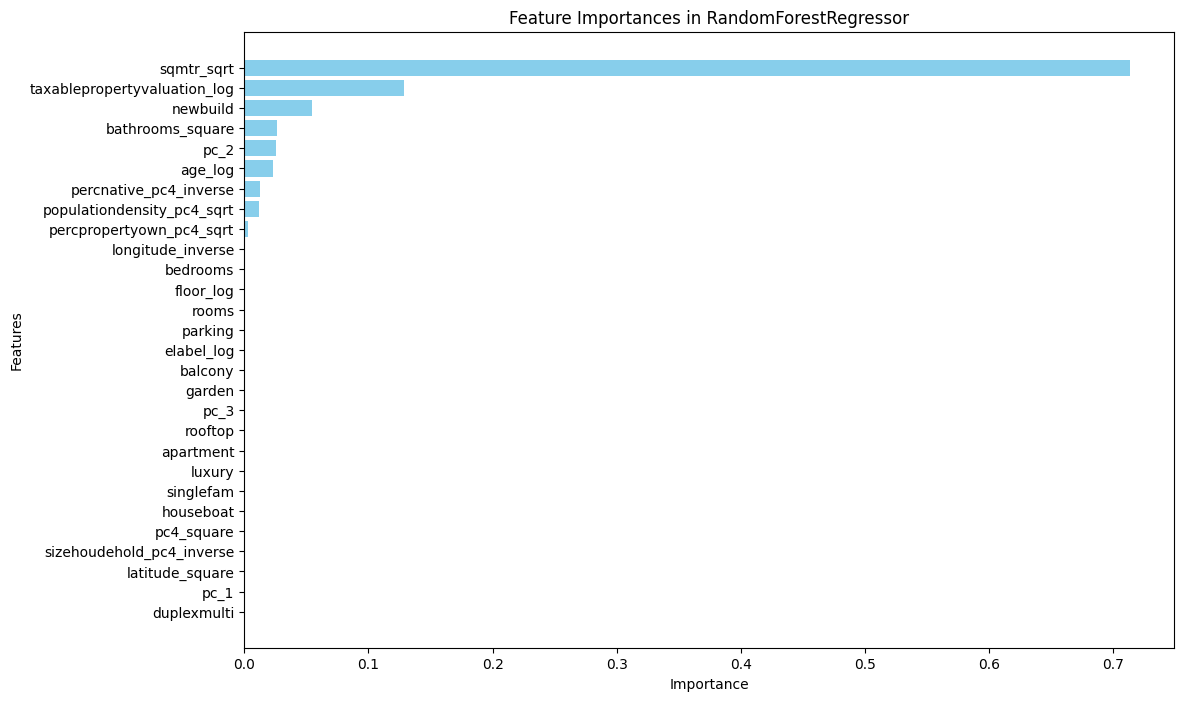

In [7]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=41)
regr.fit(X_train_final, y_train)
importances = regr.feature_importances_
features = X_train_final.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=True)
print(importance_df)

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in RandomForestRegressor')
plt.show()

                         Feature    Importance       Std
18        percnative_pc4_inverse -6.218474e-04  0.000881
13                   duplexmulti -3.491787e-04  0.000554
3                          rooms -4.281394e-06  0.000991
16                     houseboat  0.000000e+00  0.000000
14                        luxury  0.000000e+00  0.000000
23               latitude_square  1.389764e-08  0.000001
10                       balcony  5.186563e-04  0.001310
4                     elabel_log  6.391006e-04  0.003107
15                     singlefam  2.930198e-03  0.002215
8                      floor_log  3.020632e-03  0.001880
11                       rooftop  4.000611e-03  0.004776
0                        age_log  4.654228e-03  0.003672
12                     apartment  5.721450e-03  0.004102
25                          pc_1  6.616306e-03  0.005929
22    populationdensity_pc4_sqrt  8.187929e-03  0.002341
9                         garden  8.794744e-03  0.001889
27                          pc_

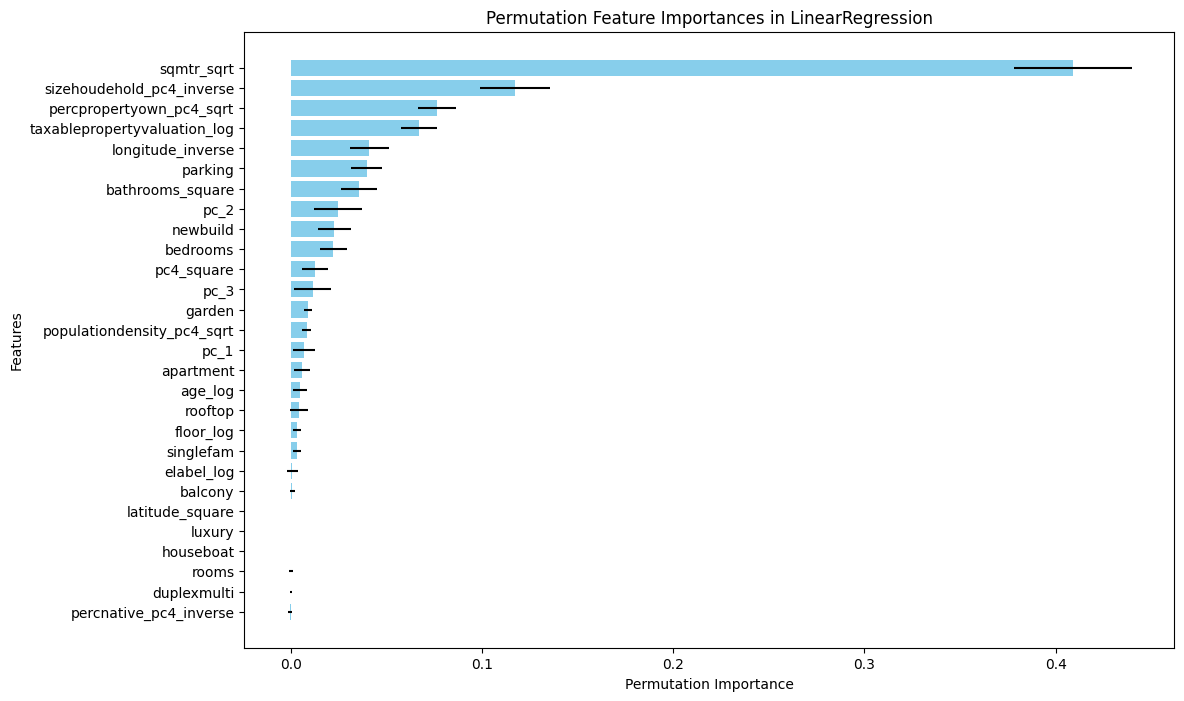

In [12]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression

# Compute permutation feature importance
model = LinearRegression()
model.fit(X_train_final, y_train)

result = permutation_importance(model, X_val_final, y_val, n_repeats=10, random_state=42, n_jobs=2)

# Get feature importances and standard deviations
importances = result.importances_mean
stds = result.importances_std

# Create a DataFrame for better visualization
features = X_train_final.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances,
    'Std': stds
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)  # Sort ascending for horizontal bar plot

# Display the DataFrame
print(importance_df)

# Plot horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importances in LinearRegression')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load dataset and split into train and test sets
X, y = load_your_data()  # Replace with your data loading function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Compute permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
importances = result.importances_mean

# Create a dataframe with feature importances
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Compute distance matrix (using correlation distance)
distance_matrix = 1 - np.corrcoef(importance_df['importance'].values)

# Perform hierarchical clustering
linked = linkage(distance_matrix, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=importance_df['feature'].values, orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Feature Importances)')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()


In [9]:
X_train_final = X_train_final.drop(columns={'percnative_pc4_inverse', 'duplexmulti', 'houseboat', 'luxury', 'latitude_square', 'balcony'})
X_val_final = X_val_final.drop(columns={'percnative_pc4_inverse', 'duplexmulti', 'houseboat', 'luxury', 'latitude_square', 'balcony'})
X_test_final = X_test_final.drop(columns={'percnative_pc4_inverse', 'duplexmulti', 'houseboat', 'luxury', 'latitude_square', 'balcony'})

In [63]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization

pbounds = {
    'n_estimators': (50, 1000),
    'max_features': (0.1, 0.999),  # Will be rounded to ['auto', 'sqrt', 'log2']
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'bootstrap': (0, 1)  # Will be converted to [True, False]
}

# Define an objective function for Bayesian Optimization
def rf_cv(n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, bootstrap):
    # Convert continuous hyperparameters to categorical ones
    max_features = int(max_features)
    max_features = [None, 'sqrt', 'log2'][max_features % 3]
    bootstrap = bool(int(bootstrap))

    # Create the model
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_features=max_features,
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        bootstrap=bootstrap,
        random_state=42
    )

    # Fit the model on the training set
    model.fit(X_train_final, y_train)

    # Predict on the validation set
    val_pred = model.predict(X_val_final)

    # Calculate the mean squared error
    mse = mean_squared_error(y_val, val_pred)
    
    return -mse  # Return negative MSE because BayesianOptimization maximizes the objective

# Optimize hyperparameters using Bayesian Optimization
optimizer = BayesianOptimization(
    f=rf_cv,
    pbounds=pbounds,
    random_state=42,
)

optimizer.maximize(
    init_points=10,  # Number of random initial points
    n_iter=50,       # Number of iterations
)

print("Best parameters found: ", optimizer.max['params'])

# Convert the best parameters to the correct format
best_params = optimizer.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_features'] = int(best_params['max_features'])
best_params['max_features'] = [None, 'sqrt', 'log2'][best_params['max_features'] % 3]
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
best_params['min_samples_leaf'] = int(best_params['min_samples_leaf'])
best_params['bootstrap'] = bool(int(best_params['bootstrap']))
print("Best parameters formatted: ", best_params)

# Train the best model with the full training+validation set
rfr_best = RandomForestRegressor(**best_params, random_state=42)
rfr_best.fit(X_train_final, y_train)

# Evaluate the model on the test set
y_pred = rfr_best.predict(X_test_final)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error on test set: ", mse)
print("Root Mean Squared Error on test set: ", rmse)

|   iter    |  target   | bootstrap | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------
| 1         | -0.04535  | 0.3745    | 19.06     | 0.7581    | 12.37     | 4.808     | 198.2     |
| 2         | -0.04671  | 0.05808   | 17.46     | 0.6404    | 14.45     | 2.371     | 971.4     |
| 3         | -0.05676  | 0.8324    | 5.034     | 0.2635    | 4.485     | 7.476     | 548.5     |
| 4         | -0.05533  | 0.4319    | 6.533     | 0.6501    | 3.65      | 7.259     | 398.0     |
| 5         | -0.04568  | 0.4561    | 15.92     | 0.2795    | 10.77     | 12.66     | 94.13     |
| 6         | -0.06202  | 0.6075    | 4.24      | 0.1585    | 19.03     | 19.38     | 818.0     |
| 7         | -0.08066  | 0.3046    | 2.856     | 0.7151    | 9.363     | 4.197     | 520.4     |
| 8         | -0.04519  | 0.03439   | 18.28     | 0.3326    | 13.59     | 7.611     | 544.1     |
| 9         | -0.061

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_predict_test = rfr.predict(X_test)

scoring = {'mse': make_scorer(root_mean_squared_error)}

cv_results = cross_validate(rfr, X_test, y_test, cv=5, scoring=scoring, return_train_score=False)

# Output the cross-validation results
print("Test MSE for each fold:", cv_results['test_mse'])
print("Mean Test MSE:", np.mean(cv_results['test_mse']))
print("Standard Deviation of Test MSE:", np.std(cv_results['test_mse']))

rmse = root_mean_squared_error(np.exp(y_test), np.exp(y_predict_test))
mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_predict_test))
r2 = r2_score(np.exp(y_test), np.exp(y_predict_test))

print(rmse)
print(mape)
print(r2)

Test MSE for each fold: [0.2129246  0.16834513 0.20306012 0.2608586  0.18601166]
Mean Test MSE: 0.20624002238821562
Standard Deviation of Test MSE: 0.031251219783996205
801.8229096987511
0.10935877814939504
0.7011717364880057


In [8]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_predict_test = regr.predict(X_test)

scoring = {'mse': make_scorer(root_mean_squared_error)}

cv_results = cross_validate(rfr, X_test, y_test, cv=5, scoring=scoring, return_train_score=False)

# Output the cross-validation results
print("Test MSE for each fold:", cv_results['test_mse'])
print("Mean Test MSE:", np.mean(cv_results['test_mse']))
print("Standard Deviation of Test MSE:", np.std(cv_results['test_mse']))

rmse = root_mean_squared_error(np.exp(y_test), np.exp(y_predict_test))
mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_predict_test))
r2 = r2_score(np.exp(y_test), np.exp(y_predict_test))

print(rmse)
print(mape)
print(r2)

Test MSE for each fold: [0.2129246  0.16834513 0.20306012 0.2608586  0.18601166]
Mean Test MSE: 0.20624002238821562
Standard Deviation of Test MSE: 0.031251219783996205
1421.3253302813796
0.202959595577503
0.061029946704179716


In [15]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': (201,1001,100),
    'max_depth': (10, 50, 10),
    'min_samples_split': (1, 10, 2),
    'min_samples_leaf': (1, 10, 2)
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Performance of the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

/home/anass/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/home/anass/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/home/anass/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anass/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/anass/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/anass/.local/l

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


NameError: name 'mean_squared_error' is not defined

In [16]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
print("Test RMSE: ", root_mean_squared_error(y_test, y_pred))

Test RMSE:  743.1464477732666
